<a href="https://colab.research.google.com/github/amanoj03/Machine-Learning/blob/master/Neural_Networks_Mnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt
import numpy as np


In [0]:
mnsit = tf.keras.datasets.mnist

In [7]:
(X_train,y_train),(X_test,y_test) = mnsit.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train[0].shape


(28, 28)

In [0]:
X_train,X_test =  X_train/255.0,X_test/255.0


In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

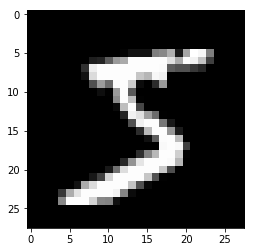

In [16]:
plt.imshow(np.reshape(X_train[0],(28,28)),cmap=plt.cm.gray)

In [0]:
model = tf.keras.models.Sequential(
[
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation='softmax'),
]
)

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [38]:
model.fit(X_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.7227 - acc: 0.8029
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3813 - acc: 0.8921
Epoch 3/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3216 - acc: 0.9074
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2871 - acc: 0.9178
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2594 - acc: 0.9257


In [41]:
model.evaluate(X_test,y_test,verbose=1)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.2148 - acc: 0.9382


[0.2147643967345357, 0.9382]

In [0]:
a=model.predict(np.expand_dims(X_test[0],0))

In [46]:
a

array([[7.7487770e-05, 9.6769691e-07, 6.8646501e-04, 1.4330805e-03,
        2.7245824e-06, 1.1551305e-04, 1.3653100e-07, 9.9614489e-01,
        4.3553882e-05, 1.4950461e-03]], dtype=float32)

In [47]:
np.argmax(a)

7

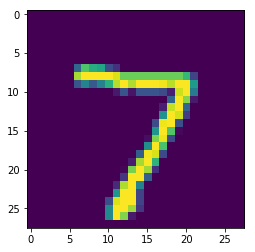

In [48]:
plt.imshow(np.reshape(X_test[0],(28,28)))

In [0]:
from keras.preprocessing import  image
import cv2

In [52]:
img = image.load_img("/content/download.png",grayscale=True,target_size=(28,28))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


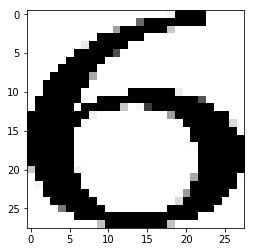

In [57]:
plt.imshow(np.reshape(img,(28,28)),cmap=plt.cm.gray)

In [0]:
img_reverted = cv2.bitwise_not(np.reshape(img,(28,28)))